# Project 04: Movielens Dataset Analysis

**Problem Objective :**

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

**Domain: Entertainment**

**Analysis Tasks to be performed:**

* Import the three datasets
* Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i)  * Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)
* Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
1. User Age Distribution
2. User rating of the movie “Toy Story”
3. Top 25 movies by viewership rating
4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696
**Feature Engineering:**
            **Use column genres:**

* Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
* Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
* Determine the features affecting the ratings of any particular movie.
* Develop an appropriate model to predict the movie ratings



**Dataset downloaded from https://github.com/Simplilearn-Edu/Data-Science-with-Python-Project-One/blob/master/Data%20science%20with%20Python%201.zip **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
users = pd.read_csv(r'E:\Data Sciene with Python- Samridhi\Projects for Submission\Project4_Movielens\users.dat', sep = '::',engine = 'python', header=None,names = ['UserID','Gender','Age','Occupation','Zip_code'])

In [3]:
users.head()

,UserID,Gender,Age,Occupation,Zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
users.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip_code      0
dtype: int64

In [5]:
users.shape

(6040, 5)

In [6]:
movies = pd.read_csv(r'E:\Data Sciene with Python- Samridhi\Projects for Submission\Project4_Movielens\movies.dat', sep = '::',engine='python',header = None, names = ['MovieID','Title','Genre'])

In [7]:
movies.head()

,MovieID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
movies.shape

(3883, 3)

In [9]:
ratings = pd.read_csv(r'E:\Data Sciene with Python- Samridhi\Projects for Submission\Project4_Movielens\ratings.dat', sep = '::', engine = 'python', header = None, names = ['UserID','MovieID','Rating','Timestamp'])

In [10]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [11]:
ratings.shape

(1000209, 4)

In [12]:
movie_ratings = pd.merge(movies, ratings, on = 'MovieID')

In [13]:
movie_ratings.head()

,MovieID,Title,Genre,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [14]:
master_data = pd.merge(movie_ratings, users, on ='UserID')

In [15]:
master_data.head()

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip_code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [16]:
master_data.shape

(1000209, 10)

In [17]:
master_data.isnull().sum()

MovieID       0
Title         0
Genre         0
UserID        0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip_code      0
dtype: int64

In [18]:
master_data[:500].MovieID.value_counts()

1       5
527     4
150     4
2858    3
608     3
       ..
538     1
3826    1
2541    1
2336    1
3072    1
Name: MovieID, Length: 389, dtype: int64

In [19]:
master_data = master_data.iloc[np.random.permutation(master_data.shape[0]),:]

In [20]:
final_data = master_data[:5000]
final_data.Genre.head()

940180              Drama|Thriller
516044      Action|Sci-Fi|Thriller
932863                Comedy|Drama
219336       Action|Crime|Thriller
812868    Action|Adventure|Mystery
Name: Genre, dtype: object

In [21]:
len(final_data[:5000].MovieID.value_counts())

1762

In [22]:
final_data.tail()

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip_code
200788,870,Gone Fishin' (1997),Comedy,1980,2,974775236,M,35,7,06460
680750,2746,Little Shop of Horrors (1986),Comedy|Horror|Musical,5236,3,961444521,M,25,14,46268
153116,1263,"Deer Hunter, The (1978)",Drama|War,1592,4,974735184,M,35,7,50111
942730,196,Species (1995),Horror|Sci-Fi,4440,3,965096869,M,35,1,81005
773930,3421,Animal House (1978),Comedy,5019,5,986271187,M,25,7,10025


### Visualize user age distribution

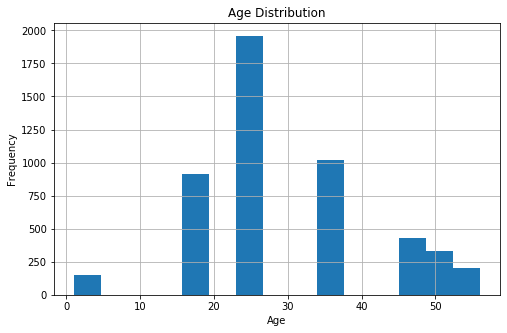

In [23]:
final_data.Age.hist(bins=15, figsize = (8,5))
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### Visualize overall rating by users

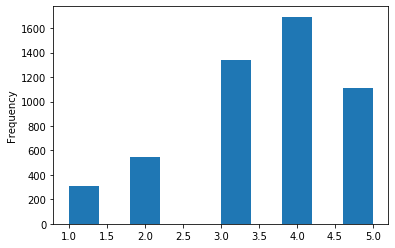

In [24]:
final_data.Rating.plot(kind = 'hist')

### Find and visualize the user rating of the movie “Toy Story”

In [25]:
import re

In [26]:
title = final_data.iloc[0].Title
title

'Silence of the Lambs, The (1991)'

In [27]:
re.search('Toy Story', title)!=None

False

In [28]:
def rating_toystory(a):
    return re.search('Toy Story'.lower(), a.lower())!=None

In [29]:
rating_toystory(title)

False

In [30]:
final_data['Title'].apply(rating_toystory)

940180    False
516044    False
932863    False
219336    False
812868    False
          ...  
200788    False
680750    False
153116    False
942730    False
773930    False
Name: Title, Length: 5000, dtype: bool

In [31]:
toy_story = master_data[master_data['Title'].apply(rating_toystory)]

In [32]:
toy_story.shape

(3662, 10)

In [33]:
toy_story['Rating'].groupby(toy_story['Title']).count()

Title
Toy Story (1995)      2077
Toy Story 2 (1999)    1585
Name: Rating, dtype: int64

In [34]:
avg_rating = toy_story['Rating'].groupby(toy_story['Title']).sum()/toy_story['Rating'].groupby(toy_story['Title']).count()
avg_rating.rename('Avg Rating', inplace = True)
avg_rating.round()

Title
Toy Story (1995)      4.0
Toy Story 2 (1999)    4.0
Name: Avg Rating, dtype: float64

#### We can conclude Toystory movie has got average rating of 4*

### Find and visualize the viewership of the movie “Toy Story” by age group

In [35]:
 master_data.head()

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip_code
940180,593,"Silence of the Lambs, The (1991)",Drama|Thriller,4924,4,962667332,F,35,0,99801
516044,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller,5387,5,960336958,F,25,1,45056
932863,1968,"Breakfast Club, The (1985)",Comedy|Drama,4604,5,989761723,M,25,15,10461
219336,6,Heat (1995),Action|Crime|Thriller,2116,4,974649357,M,18,4,49546
812868,2414,Young Sherlock Holmes (1985),Action|Adventure|Mystery,5327,5,961101284,M,25,7,55408


In [36]:
viewership = master_data[master_data['MovieID']==1]
viewership

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip_code
116590,1,Toy Story (1995),Animation|Children's|Comedy,1243,4,994719642,M,35,15,92627
522368,1,Toy Story (1995),Animation|Children's|Comedy,5461,5,959903433,M,50,0,94025
234642,1,Toy Story (1995),Animation|Children's|Comedy,2379,4,974330927,M,18,18,13045
466474,1,Toy Story (1995),Animation|Children's|Comedy,4823,3,962918961,M,18,4,46219
290067,1,Toy Story (1995),Animation|Children's|Comedy,3146,3,968964836,M,25,0,31605
...,...,...,...,...,...,...,...,...,...,...
324961,1,Toy Story (1995),Animation|Children's|Comedy,3476,4,967128653,M,50,0,44126
23376,1,Toy Story (1995),Animation|Children's|Comedy,302,4,976505024,M,18,4,04901
553873,1,Toy Story (1995),Animation|Children's|Comedy,5779,3,958156694,M,25,5,10011
382353,1,Toy Story (1995),Animation|Children's|Comedy,3943,5,965690979,F,35,7,98074


In [37]:
viewership.groupby('Age').size()

Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
dtype: int64

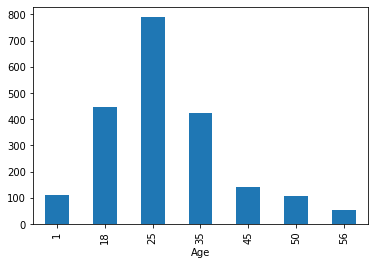

In [38]:
viewership.groupby('Age').size().plot.bar()

#### Above plot shows Toystory movie is most popular among people with age 25

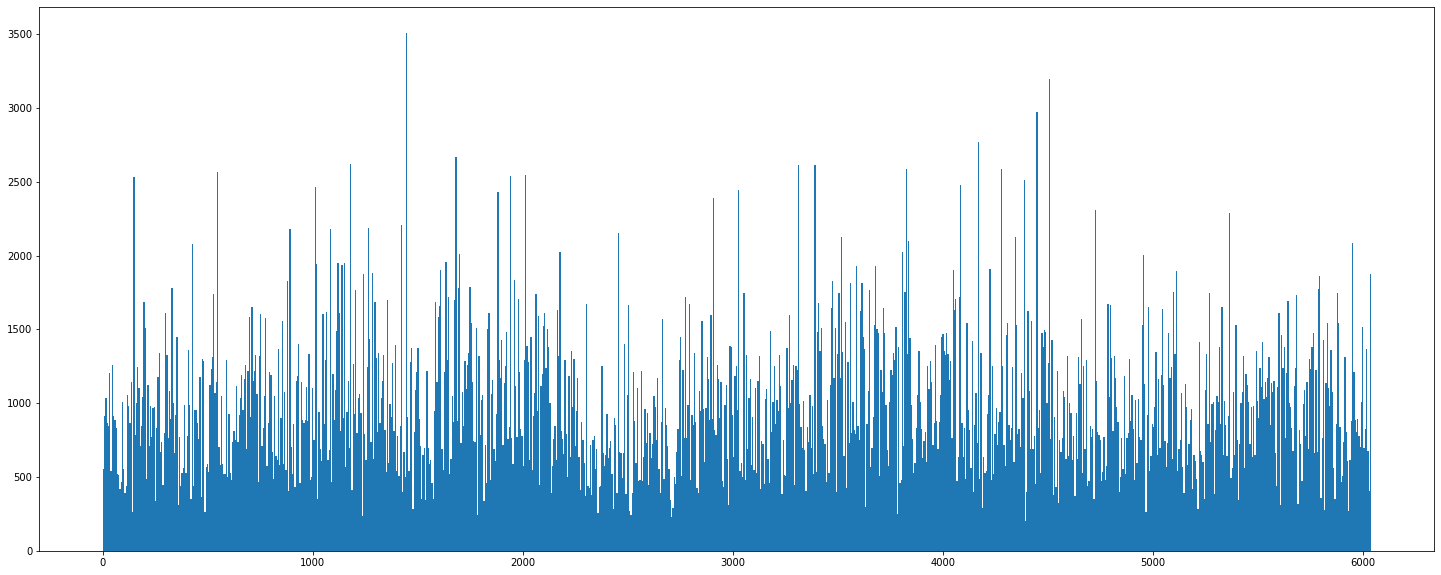

In [39]:
plt.figure(figsize=(25,10))
plt.hist(x= master_data.UserID,bins=1000)
plt.show()

### Find and visualize the top 25 movies by viewership rating

In [40]:
pd.DataFrame(master_data.groupby(['MovieID','Title']).Rating.size().sort_values(ascending = False).head(25))

,,Rating
MovieID,Title,
2858,American Beauty (1999),3428
260,Star Wars: Episode IV - A New Hope (1977),2991
1196,Star Wars: Episode V - The Empire Strikes Back (1980),2990
1210,Star Wars: Episode VI - Return of the Jedi (1983),2883
480,Jurassic Park (1993),2672
2028,Saving Private Ryan (1998),2653
589,Terminator 2: Judgment Day (1991),2649
2571,"Matrix, The (1999)",2590
1270,Back to the Future (1985),2583


In [41]:
movie_rating = final_data.groupby(['MovieID','Title']).Timestamp.count().sort_values(ascending = False).head(25)

In [42]:
movie_rating

MovieID  Title                                            
608      Fargo (1996)                                         21
3175     Galaxy Quest (1999)                                  18
1210     Star Wars: Episode VI - Return of the Jedi (1983)    18
589      Terminator 2: Judgment Day (1991)                    16
1200     Aliens (1986)                                        16
480      Jurassic Park (1993)                                 15
296      Pulp Fiction (1994)                                  15
2396     Shakespeare in Love (1998)                           14
1073     Willy Wonka and the Chocolate Factory (1971)         14
1617     L.A. Confidential (1997)                             14
1197     Princess Bride, The (1987)                           14
2997     Being John Malkovich (1999)                          14
32       Twelve Monkeys (1995)                                14
110      Braveheart (1995)                                    13
2028     Saving Private Ryan (1

### Find the rating for a particular user of user id = 2696

In [43]:
user_rating = master_data.loc[master_data['UserID']==2696][['UserID','MovieID','Title','Rating','Timestamp']]
user_rating

,UserID,MovieID,Title,Rating,Timestamp
991046,2696,1711,Midnight in the Garden of Good and Evil (1997),4,973308904
991039,2696,1258,"Shining, The (1980)",4,973308710
991043,2696,1625,"Game, The (1997)",4,973308842
991037,2696,1092,Basic Instinct (1992),4,973308886
991053,2696,3176,"Talented Mr. Ripley, The (1999)",4,973308865
991045,2696,1645,"Devil's Advocate, The (1997)",4,973308904
991036,2696,800,Lone Star (1996),5,973308842
991047,2696,1783,Palmetto (1998),4,973308865
991050,2696,2338,I Still Know What You Did Last Summer (1998),2,973308920
991038,2696,1097,E.T. the Extra-Terrestrial (1982),3,973308690


### Visualize the rating data by user of user id = 2696

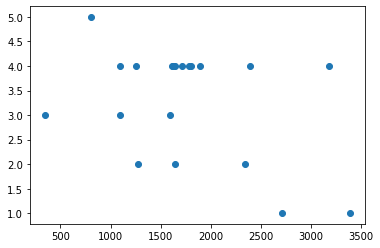

In [44]:
plt.scatter(x = user_rating['MovieID'], y = user_rating['Rating'])
plt.show()

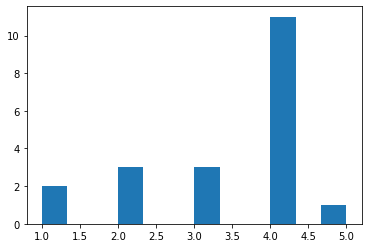

In [45]:
plt.hist(user_rating['Rating'],bins=12)
plt.show()

E:\Anaconda Installation\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 2696.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
E:\Anaconda Installation\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 2696.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
E:\Anaconda Installation\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 2696.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])


<Figure size 1080x576 with 0 Axes>

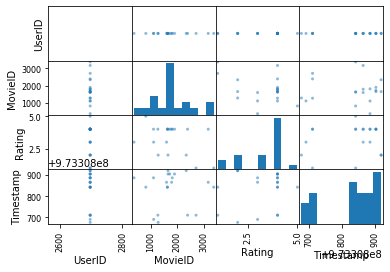

In [46]:
from pandas.plotting import scatter_matrix
plt.figure(figsize = (15,8))
scatter_matrix(user_rating)
plt.show()

In [47]:
final_data.head()

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip_code
940180,593,"Silence of the Lambs, The (1991)",Drama|Thriller,4924,4,962667332,F,35,0,99801
516044,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller,5387,5,960336958,F,25,1,45056
932863,1968,"Breakfast Club, The (1985)",Comedy|Drama,4604,5,989761723,M,25,15,10461
219336,6,Heat (1995),Action|Crime|Thriller,2116,4,974649357,M,18,4,49546
812868,2414,Young Sherlock Holmes (1985),Action|Adventure|Mystery,5327,5,961101284,M,25,7,55408


In [48]:
final_data.Genre = final_data.loc[:,'Genre'].str.split('|')
final_data.Genre

E:\Anaconda Installation\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


940180               [Drama, Thriller]
516044      [Action, Sci-Fi, Thriller]
932863                 [Comedy, Drama]
219336       [Action, Crime, Thriller]
812868    [Action, Adventure, Mystery]
                      ...             
200788                        [Comedy]
680750       [Comedy, Horror, Musical]
153116                    [Drama, War]
942730                [Horror, Sci-Fi]
773930                        [Comedy]
Name: Genre, Length: 5000, dtype: object

In [49]:
final_data.Genre.dropna(inplace = True)

E:\Anaconda Installation\lib\site-packages\pandas\core\series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [50]:
final_data.Genre.isnull().sum()

0

In [51]:
final_data.dropna(inplace = True)

E:\Anaconda Installation\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
final_data.isnull().sum()

MovieID       0
Title         0
Genre         0
UserID        0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip_code      0
dtype: int64

In [53]:
#concatenate all these lists to a single list
genre_list = []
for i in range(len(final_data)):
    genre_list = genre_list+final_data.iloc[i].Genre
genre_list

['Drama',
 'Thriller',
 'Action',
 'Sci-Fi',
 'Thriller',
 'Comedy',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Action',
 'Adventure',
 'Mystery',
 'Comedy',
 'Comedy',
 'Sci-Fi',
 'Adventure',
 "Children's",
 'Sci-Fi',
 'Action',
 'Drama',
 'War',
 'Action',
 'Adventure',
 'Romance',
 'Sci-Fi',
 'War',
 'Drama',
 'Musical',
 'Mystery',
 'Action',
 'Adventure',
 'Thriller',
 'Comedy',
 'Comedy',
 'Action',
 'Thriller',
 'Drama',
 'Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Action',
 'Drama',
 'War',
 'Drama',
 'Thriller',
 'Horror',
 'Sci-Fi',
 'Action',
 'Drama',
 'Action',
 'Drama',
 'War',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Thriller',
 'Crime',
 'Drama',
 'Comedy',
 'Comedy',
 'Western',
 'Comedy',
 'Action',
 'Drama',
 'War',
 'Adventure',
 'Drama',
 'Drama',
 'Action',
 "Children's",
 'Fantasy',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Sci-Fi',
 'Drama',
 'Drama',
 'Comedy',
 'Sci-Fi',
 'Animation',
 "Children's",
 'Musical',
 'Drama',
 "Children's",
 'Horror',
 'Action',


In [54]:
unique_genres = list(set(genre_list))
print(unique_genres)

['Thriller', 'Crime', 'Western', 'Animation', 'War', 'Fantasy', 'Documentary', 'Drama', 'Comedy', 'Sci-Fi', 'Adventure', "Children's", 'Film-Noir', 'Action', 'Horror', 'Romance', 'Musical', 'Mystery']


In [55]:
unique_genres = pd.Series(unique_genres)
len(unique_genres)

18

In [56]:
row = final_data.Genre.iloc[0]
row

['Drama', 'Thriller']

In [57]:
a = unique_genres.isin(row)
print(a)

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
dtype: bool


In [58]:
df = pd.DataFrame()
for row in final_data.Genre:
    a = unique_genres.isin(row)
    df = df.append(a, ignore_index = True)

In [59]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [60]:
df.shape, final_data.shape

((5000, 18), (5000, 10))

In [61]:
df.columns = unique_genres
df.columns

Index(['Thriller', 'Crime', 'Western', 'Animation', 'War', 'Fantasy',
       'Documentary', 'Drama', 'Comedy', 'Sci-Fi', 'Adventure', 'Children's',
       'Film-Noir', 'Action', 'Horror', 'Romance', 'Musical', 'Mystery'],
      dtype='object')

In [62]:
df.head(2)

,Thriller,Crime,Western,Animation,War,Fantasy,Documentary,Drama,Comedy,Sci-Fi,Adventure,Children's,Film-Noir,Action,Horror,Romance,Musical,Mystery
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [63]:
final_data.columns

Index(['MovieID', 'Title', 'Genre', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip_code'],
      dtype='object')

In [64]:
final_data.reset_index(inplace= True)
final_data.head(2)

,index,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip_code
0,940180,593,"Silence of the Lambs, The (1991)","[Drama, Thriller]",4924,4,962667332,F,35,0,99801
1,516044,589,Terminator 2: Judgment Day (1991),"[Action, Sci-Fi, Thriller]",5387,5,960336958,F,25,1,45056


In [65]:
final_data.drop("index", axis = 1, inplace= True)

E:\Anaconda Installation\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [66]:
final_data.columns

Index(['MovieID', 'Title', 'Genre', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip_code'],
      dtype='object')

In [67]:
final_data = pd.concat((final_data, df), axis = 1)
final_data.head(2)

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip_code,...,Comedy,Sci-Fi,Adventure,Children's,Film-Noir,Action,Horror,Romance,Musical,Mystery
0,593,"Silence of the Lambs, The (1991)","[Drama, Thriller]",4924,4,962667332,F,35,0,99801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,589,Terminator 2: Judgment Day (1991),"[Action, Sci-Fi, Thriller]",5387,5,960336958,F,25,1,45056,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [68]:
final_data.columns

Index(['MovieID', 'Title', 'Genre', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip_code', 'Thriller', 'Crime', 'Western',
       'Animation', 'War', 'Fantasy', 'Documentary', 'Drama', 'Comedy',
       'Sci-Fi', 'Adventure', 'Children's', 'Film-Noir', 'Action', 'Horror',
       'Romance', 'Musical', 'Mystery'],
      dtype='object')

In [69]:
final_data.Occupation.value_counts()

0     635
4     609
7     522
1     455
17    363
20    314
12    285
2     273
14    242
16    200
3     182
6     180
10    122
11    117
15    113
5     109
19     77
13     73
9      59
18     54
8      16
Name: Occupation, dtype: int64

In [70]:
final_data.drop(['MovieID','Title','Genre','UserID','Timestamp','Zip_code'], axis =1, inplace= True)

In [71]:
final_data.columns, final_data.shape

(Index(['Rating', 'Gender', 'Age', 'Occupation', 'Thriller', 'Crime', 'Western',
        'Animation', 'War', 'Fantasy', 'Documentary', 'Drama', 'Comedy',
        'Sci-Fi', 'Adventure', 'Children's', 'Film-Noir', 'Action', 'Horror',
        'Romance', 'Musical', 'Mystery'],
       dtype='object'),
 (5000, 22))

In [72]:
final_data.head()

,Rating,Gender,Age,Occupation,Thriller,Crime,Western,Animation,War,Fantasy,...,Comedy,Sci-Fi,Adventure,Children's,Film-Noir,Action,Horror,Romance,Musical,Mystery
0,4,F,35,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,F,25,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5,M,25,15,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,M,18,4,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,M,25,7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [73]:
#Convert Gender column to numeric vectors
gender_dummies = pd.get_dummies(final_data['Gender'], prefix= 'Gender' ,drop_first= True)

In [74]:
gender_dummies.head()

,Gender_M
0,0
1,0
2,1
3,1
4,1


In [75]:
final_data = pd.concat((final_data, gender_dummies), axis=1)
final_data.head()

,Rating,Gender,Age,Occupation,Thriller,Crime,Western,Animation,War,Fantasy,...,Sci-Fi,Adventure,Children's,Film-Noir,Action,Horror,Romance,Musical,Mystery,Gender_M
0,4,F,35,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5,F,25,1,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,5,M,25,15,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,4,M,18,4,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,5,M,25,7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1


In [76]:
final_data.drop('Gender',inplace=True, axis =1)

In [77]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   int64  
 1   Age          5000 non-null   int64  
 2   Occupation   5000 non-null   int64  
 3   Thriller     5000 non-null   float64
 4   Crime        5000 non-null   float64
 5   Western      5000 non-null   float64
 6   Animation    5000 non-null   float64
 7   War          5000 non-null   float64
 8   Fantasy      5000 non-null   float64
 9   Documentary  5000 non-null   float64
 10  Drama        5000 non-null   float64
 11  Comedy       5000 non-null   float64
 12  Sci-Fi       5000 non-null   float64
 13  Adventure    5000 non-null   float64
 14  Children's   5000 non-null   float64
 15  Film-Noir    5000 non-null   float64
 16  Action       5000 non-null   float64
 17  Horror       5000 non-null   float64
 18  Romance      5000 non-null   float64
 19  Musica

In [85]:
### Define X and y Variable
y = final_data.Rating
X = final_data.drop('Rating', axis=1)

In [86]:
X.shape, y.shape

((5000, 21), (5000,))

### Split dataset into Train and Test Set

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 2345)

In [92]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3500, 21), (3500,), (1500, 21), (1500,))

### We'll use Logistic Regression for the Classification

In [93]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [97]:
log_reg.fit(X_train, y_train)

E:\Anaconda Installation\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
y_pred_train = log_reg.predict(X_train)

### Now we will look at the Accuracy, Confusion Matrix and Classification Report 

In [101]:
#Let's import the required libraries 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [110]:
print(f'Accuracy Score : {accuracy_score(y_pred_train, y_train)}\n')

Accuracy Score : 0.7902857142857143



In [105]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier()

In [106]:
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [107]:
y_pred_train = d_tree.predict(X_train)

In [109]:
print(f'Accuracy Score : {accuracy_score(y_pred_train, y_train)}\n')

Accuracy Score : 0.7902857142857143



In [117]:
feature_imp = pd.DataFrame(d_tree.feature_importances_, index=X.columns, )

In [120]:
feature_imp.columns = ['Score']
feature_imp

,Score
Age,0.157452
Occupation,0.325282
Thriller,0.041086
Crime,0.040397
Western,0.011637
Animation,0.014691
War,0.023860
Fantasy,0.017449
Documentary,0.003827
Drama,0.005706


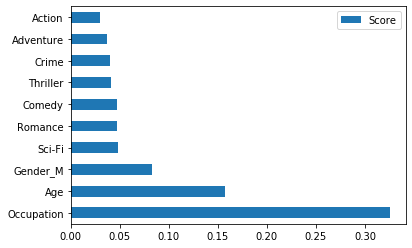

In [130]:
feature_imp.nlargest(10,columns='Score').plot(kind='barh', )

### From the above graph, We can conclude that Occupation is highly correlated with Rating followed by Age and Gender